(150, 4)


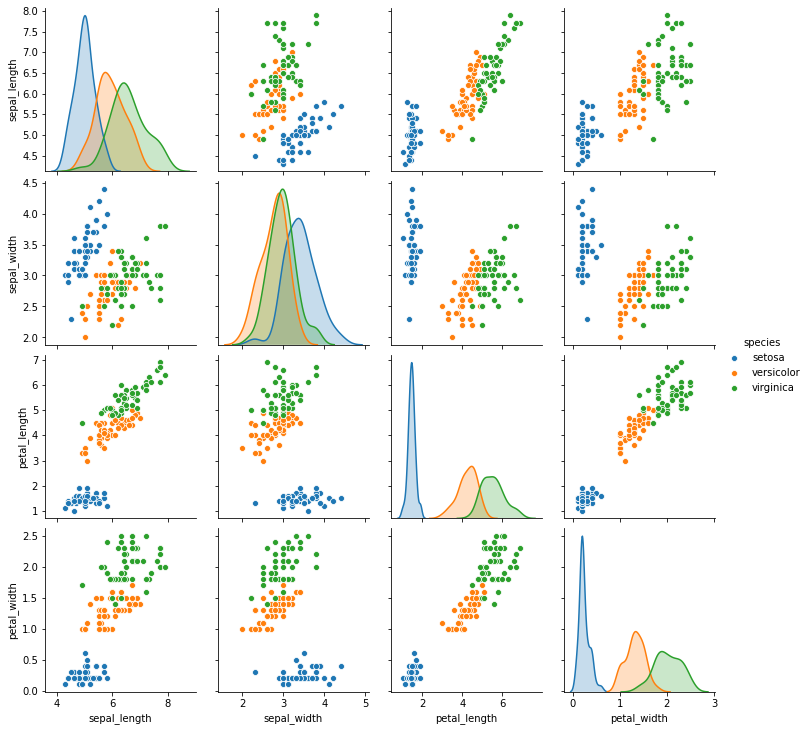

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

iris= pd.read_csv('../iris.cvs')
sb.pairplot(iris, hue = 'species') 
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)

## Parte A: PCA e redução de dimensionalidade

Matriz de covariância K:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]



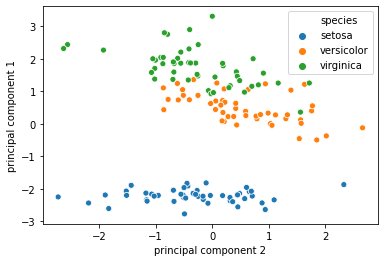

In [2]:
#Normalização dos dados
x = StandardScaler().fit_transform(data)

K = np.cov(x.T)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

plt.show()
Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(Data_2D['principal component 2'],Data_2D['principal component 1'], hue = Data_2D['species'])
plt.show()

## Parte B: Método M. Newman 

In [3]:
#Método do inverso da distância
def Inverse_distance(x,y):
    Distance = []
    epslon = 0.00000001 # avoid have zero divisions
    for i in range(len(x)):
        k = []
        for j in range(len(y)):
            k.append(1/(x[i]-y[j]+epslon))
        Distance.append(k)
    return Distance

#Criação da matriz de distâncias para os dados do PCA da iris
distances = Inverse_distance(Data_2D['principal component 2'],Data_2D['principal component 1']) 

#Diagonalização
matriz_d = []
for i in range(len(distances)):
    matriz_k = []
    #gerando a matriz diagonal
    for j in range(len(distances)):
        if i != j:
            matriz_k.append(0)
        if i == j:
            matriz_k.append(distances[i][j])
            
    matriz_d.append(matriz_k)
    
# Implementação do método laplaciano na matriz 
laplacian = np.subtract(distances,matriz_d)      

# Obtendo os autovetores e autovalores
eigenvalues_la, eigenvectors_laplacian = np.linalg.eig(laplacian)
eigenvalues_laplacian, eigenvectors_laplacian = np.linalg.eig(laplacian)
eigenvalues_la.sort()
eigenvectors_laplacian.sort()


#Obtendo o Fiedler vector a partir do segund menor autovalor
associeted_eigenvalue = eigenvalues_la[1] 
associeted_eigenvector  = eigenvectors_laplacian[1]


#Separando os Fiedler vectors, para detectar as comunidades
signals = []
for i in range(len(associeted_eigenvector)):
    if associeted_eigenvector[i] > 0:
        signals.append(0)

for i in range(len(associeted_eigenvector_2)):
    if associeted_eigenvector_2[i] > 0:
        signals.append(1)
    else:
        signals.append(2)

signals.sort()


# comunidade_1x = []
# comunidade_1y = []
# comunidade_2x = []
# comunidade_2y = []
# comunidade_3x = []
# comunidade_3y = []
# Data_2D['principal component 2'],Data_2D['principal component 1']

clusters= [[[],[]],[[],[]],[[],[]]]

for i in range(len(signals)):
    if signals[i] == 0:
        clusters[0][0].append(Data_2D['principal component 2'][i])
        clusters[0][1].append(Data_2D['principal component 1'][i])
#         comunidade_1x.append(projected_1[i])
#         comunidade_1y.append(projected_2[i])
    if signals[i] == 1:
        clusters[1][0].append(Data_2D['principal component 2'][i])
        clusters[1][1].append(Data_2D['principal component 1'][i])
    if signals[i] == 2:
        clusters[2][0].append(Data_2D['principal component 2'][i])
        clusters[2][1].append(Data_2D['principal component 1'][i])

print(len(signals))
print(confusion_matrix(signals,iris.target))

NameError: name 'associeted_eigenvector_2' is not defined

# Se eu pegar os dois autovalores consigo separar diretamente em dois grupos!!